In [1]:
# Import pandas for data handling
import pandas as pd

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("Dataset .xlsx")


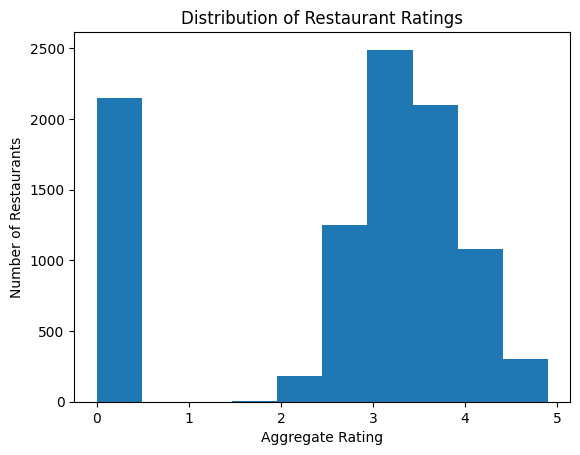

In [2]:
# Create a histogram for Aggregate Rating
plt.figure()
plt.hist(df['Aggregate rating'], bins=10)
plt.xlabel("Aggregate Rating")
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Restaurant Ratings")
plt.show()


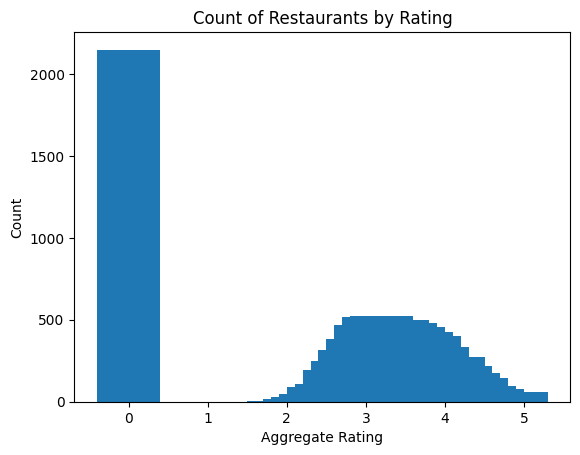

In [3]:
# Count ratings
rating_counts = df['Aggregate rating'].value_counts().sort_index()

# Bar plot for rating counts
plt.figure()
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel("Aggregate Rating")
plt.ylabel("Count")
plt.title("Count of Restaurants by Rating")
plt.show()


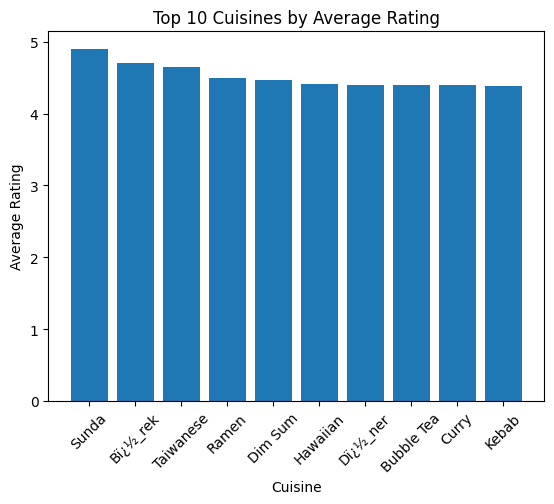

In [4]:
# Handle missing cuisines
df['Cuisines'] = df['Cuisines'].fillna('Unknown')

# Split multiple cuisines into rows
df_cuisine = df.copy()
df_cuisine['Cuisines'] = df_cuisine['Cuisines'].str.split(', ')
df_cuisine = df_cuisine.explode('Cuisines')

# Calculate average rating per cuisine
avg_rating_cuisine = (
    df_cuisine.groupby('Cuisines')['Aggregate rating']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Bar plot for top cuisines by average rating
plt.figure()
plt.bar(avg_rating_cuisine.index, avg_rating_cuisine.values)
plt.xlabel("Cuisine")
plt.ylabel("Average Rating")
plt.title("Top 10 Cuisines by Average Rating")
plt.xticks(rotation=45)
plt.show()


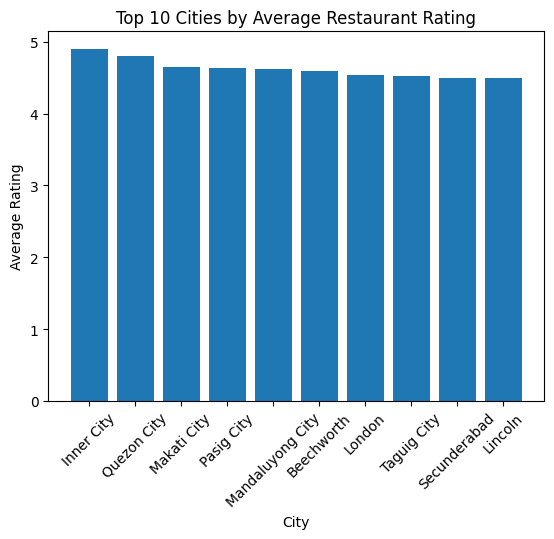

In [5]:
# Calculate average rating per city
avg_rating_city = (
    df.groupby('City')['Aggregate rating']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Bar plot for cities
plt.figure()
plt.bar(avg_rating_city.index, avg_rating_city.values)
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.title("Top 10 Cities by Average Restaurant Rating")
plt.xticks(rotation=45)
plt.show()


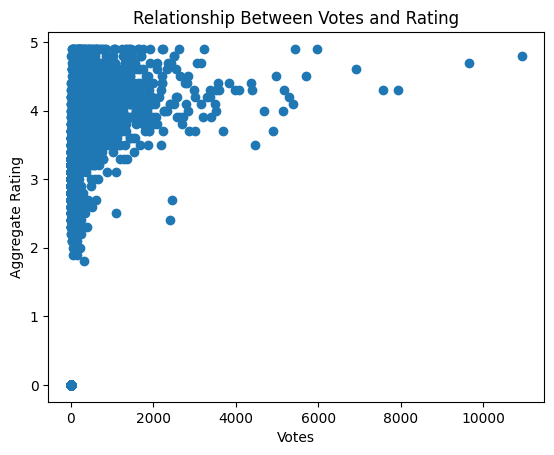

In [6]:
# Scatter plot: Votes vs Rating
plt.figure()
plt.scatter(df['Votes'], df['Aggregate rating'])
plt.xlabel("Votes")
plt.ylabel("Aggregate Rating")
plt.title("Relationship Between Votes and Rating")
plt.show()
